## Task 4.2 Supervised Learning - Classification

In [ ]:
import pandas as pd

# Load dataset and show the first rows 
file_path = '../../data/raw/diabetes.csv'
df = pd.read_csv(file_path)
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


## Fit a Generalized Linear Model (Logistic Regression)

In [3]:
from sklearn.linear_model import LogisticRegression

# Features and target
X = df.drop(columns=['class'])
y = df['class']

# Initialize and fit the model
model = LogisticRegression(max_iter=1000)
model.fit(X, y)


LogisticRegression(max_iter=1000)

## Evaluate the model

Coefficients: [[ 1.22494911e-01  3.51099335e-02 -1.32991898e-02  7.79343357e-04
  -1.17370501e-03  8.96510146e-02  8.67806473e-01  1.49842892e-02]]
Intercept: [-8.36499562]
Accuracy: 0.78125


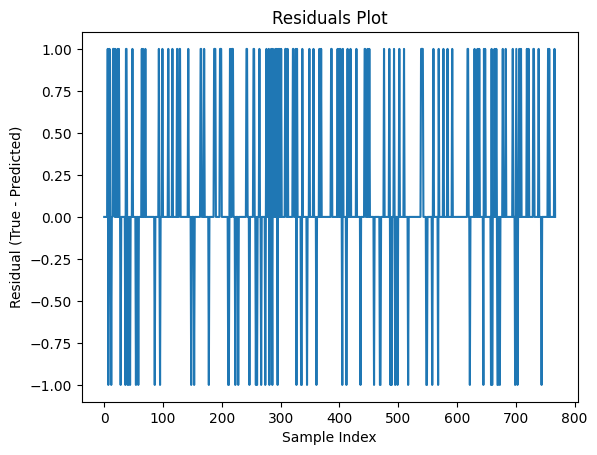

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Features and target
X = df.drop(columns=['class'])
y = df['class'].map({'tested_negative': 0, 'tested_positive': 1})  # Encode labels

# Initialize and fit the model
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# Extract coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Predict
y_pred = model.predict(X)

# Evaluate model performance
accuracy = accuracy_score(y, y_pred)
print('Accuracy:', accuracy)

# Visualize residuals (classification residuals)
residuals = y - y_pred

plt.plot(residuals)
plt.title('Residuals Plot')
plt.xlabel('Sample Index')
plt.ylabel('Residual (True - Predicted)')
plt.show()




## Train the model using cross-validation

In [8]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit model on training data
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test data
y_test_pred = model.predict(X_test)

# Evaluate model on test data
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_test, y_test_pred)
print('Test Accuracy:', test_accuracy)


Test Accuracy: 0.7467532467532467
